In [2]:
%load_ext autoreload
%autoreload 1
%autosave 60

Autosaving every 60 seconds


In [3]:
import sys
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sb
from scipy import stats
from sklearn.decomposition import PCA
import scanpy
from anndata import AnnData
import umap
import anndata

In [4]:
sys.path.append("/u/davidm/Documents/Memoire/Scripts/RNA-seq/python/")

In [5]:
import RNAseq
importlib.reload(RNAseq)

<module 'RNAseq' from '/u/davidm/Documents/Memoire/Scripts/RNA-seq/python/RNAseq.py'>

In [6]:
cell_line = "BT20"
project = "DSP992"

### Plotting parameters

In [7]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.family'] = 'DeJavu Serif'

### Raw CB frequency

In [8]:
y = pd.read_table(f"/home/arion/davidm/Data/datasets/private/RNA-seq/sc/sc-BC-cell-lines_{project}/quant/alevin/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/trimmed-reads-cutadapt/pc-decoys-k17-1.4.0/forceCells-7000-noWh/raw/{cell_line}/alevin/raw_cb_frequency.txt", header=None)[1]

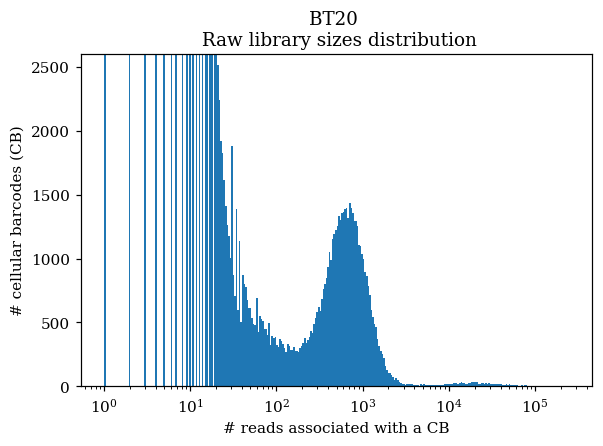

In [9]:
plt.title(f"{cell_line} \n Raw library sizes distribution")
plt.ylim(0,2600);
plt.xlabel("# reads associated with a CB")
plt.ylabel("# cellular barcodes (CB)")
RNAseq.plot_loghist(y, bins=300)

In [10]:
x = pd.read_table(f"/home/arion/davidm/Data/datasets/private/RNA-seq/sc/sc-BC-cell-lines_{project}/quant/alevin/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/trimmed-reads-cutadapt/pc-decoys-k17-1.4.0/forceCells-7000-noWh/raw/{cell_line}/alevin/featureDump.txt")

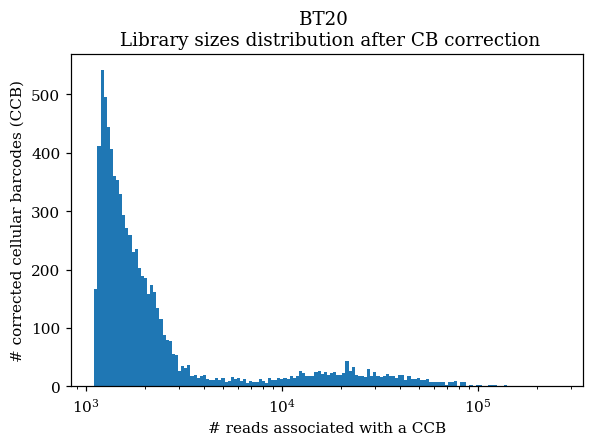

In [32]:
plt.title(f"{cell_line} \n Library sizes distribution after CB correction")
plt.xlabel("# reads associated with a CCB")
plt.ylabel("# corrected cellular barcodes (CCB)")
RNAseq.plot_loghist(x["CorrectedReads"], bins=150)

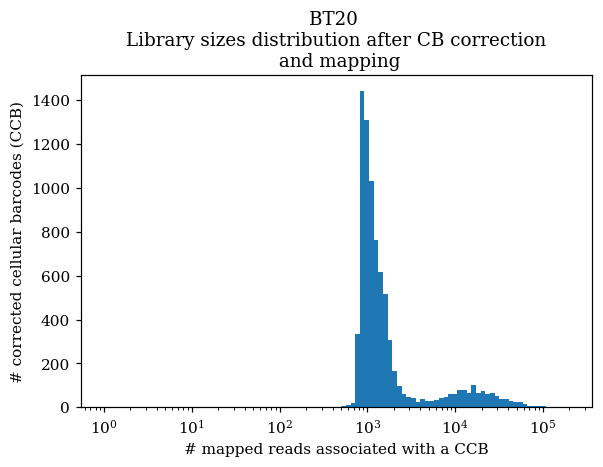

In [33]:
plt.title(f"{cell_line} \n Library sizes distribution after CB correction \n and mapping")
plt.xlabel("# mapped reads associated with a CCB")
plt.ylabel("# corrected cellular barcodes (CCB)")
RNAseq.plot_loghist(x["MappedReads"], bins=100)

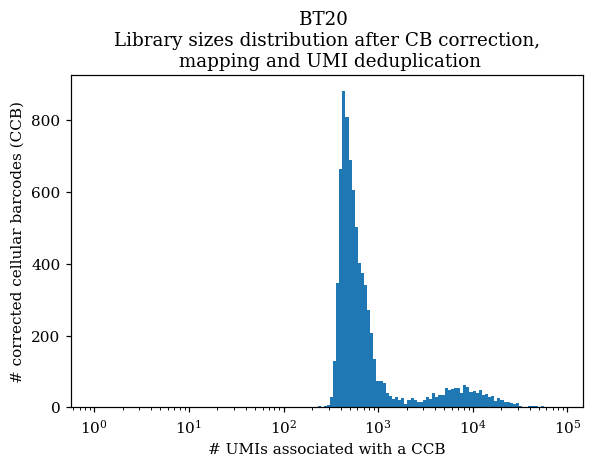

In [34]:
plt.title(f"{cell_line} \n Library sizes distribution after CB correction, \n mapping and UMI deduplication")
plt.xlabel("# UMIs associated with a CCB")
plt.ylabel("# corrected cellular barcodes (CCB)")
RNAseq.plot_loghist(x["DeduplicatedReads"], bins=150)

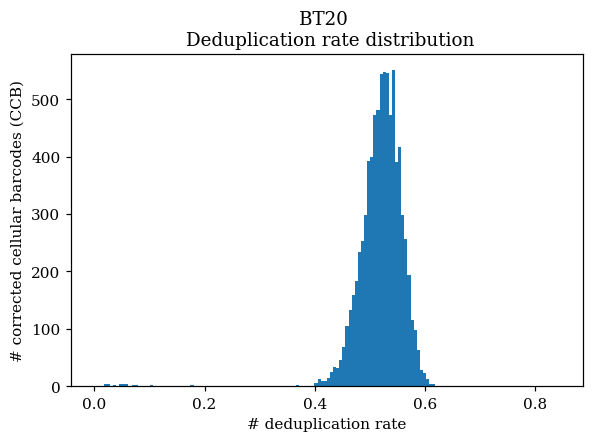

In [11]:
plt.title(f"{cell_line} \n Deduplication rate distribution")
plt.xlabel("# deduplication rate")
plt.ylabel("# corrected cellular barcodes (CCB)")
plt.hist(x["DedupRate"], bins=150);

### Loading raw count matrix

In [45]:
sc = RNAseq.sc_Dataset(project_path = f"/home/arion/davidm/Data/datasets/private/RNA-seq/sc/sc-BC-cell-lines_{project}", samples_id = "cell_lines", samples= [cell_line], quant_tool="alevin", quant_params = 'trimmed-reads-cutadapt/pc-decoys-k17-1.4.0/forceCells-7000-noWh', pp = "raw")
sc.annotate_genes(annot_name = "external_gene_name")
sc.annotate_genes(annot_name = "chromosome_name")
sc.annotate_samples(annot_name = "mt_frac")
sc.annotate_samples(annot_name = "rp_frac")
sc.save()

In [19]:
sc.mtx.shape

(7979, 20305)

### Non stringent filtering

In [38]:
sc.reload()

__QC before filtering__

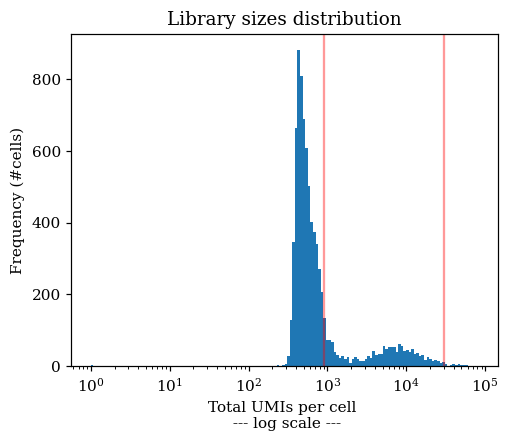

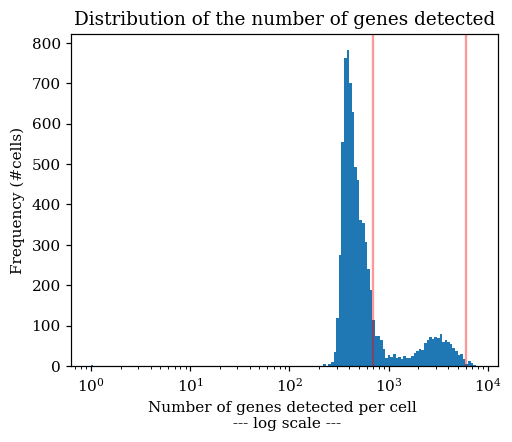

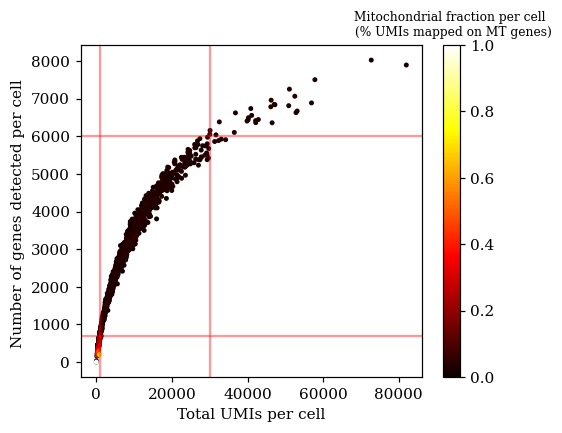

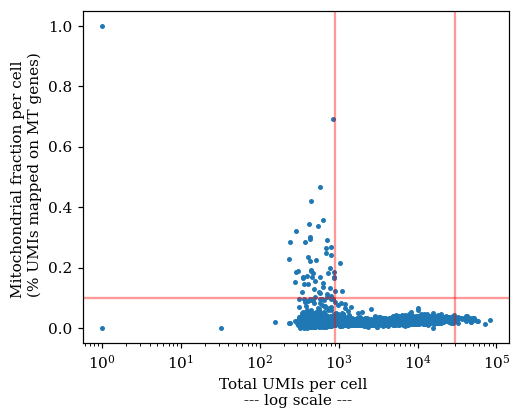

In [39]:
sc.plot_qc(n_counts_max=30000, n_counts_min = 900, n_genes_max=6000, n_genes_min = 700, mt_max = 0.1, n_bins=150)

__Filtering cells__

In [46]:
sc.filter_cells(n_counts_max=30000, n_counts_min = 900, n_genes_max=6000, n_genes_min = 700, mt_max = 0.1);

In [41]:
sc.mtx.shape

(1593, 20305)

__QC after filtering__

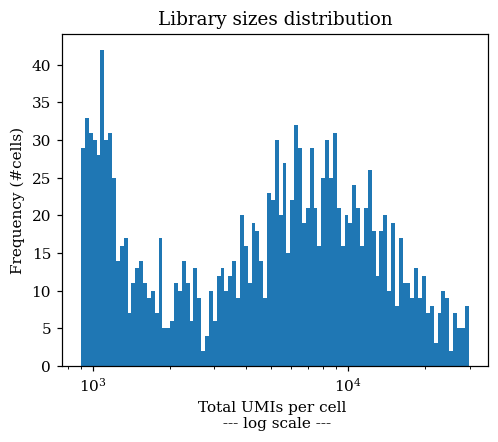

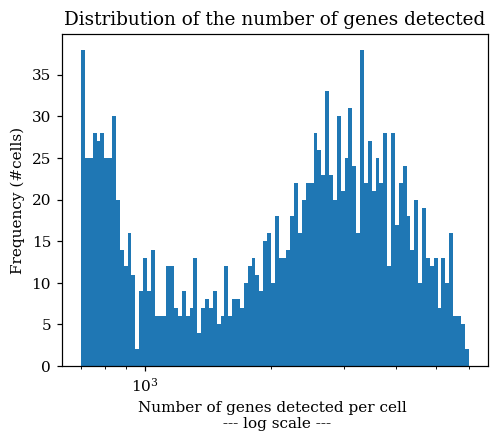

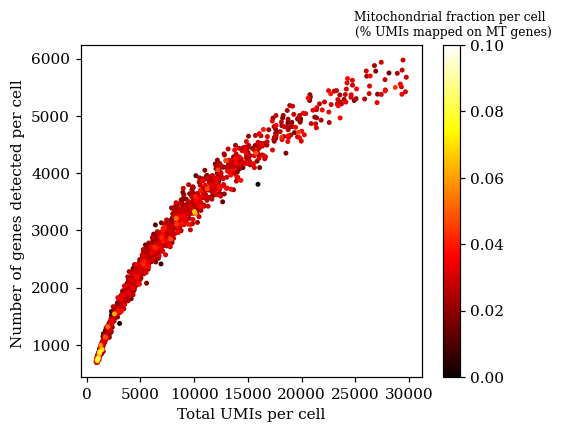

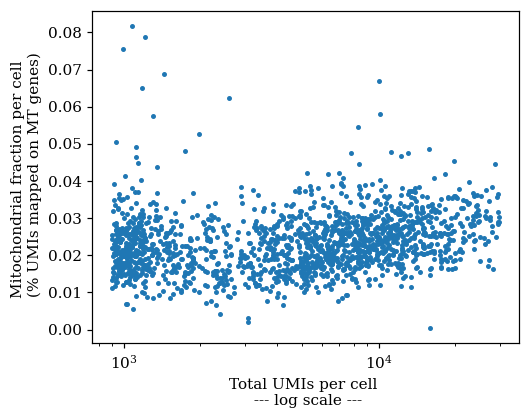

In [47]:
sc.plot_qc(show_cutoffs=False)

__Saving filtered count matrix__

In [49]:
sc.save_files(pp="filtered/non-stringent")

### Stringent filtering

In [104]:
sc.reload()

__QC__

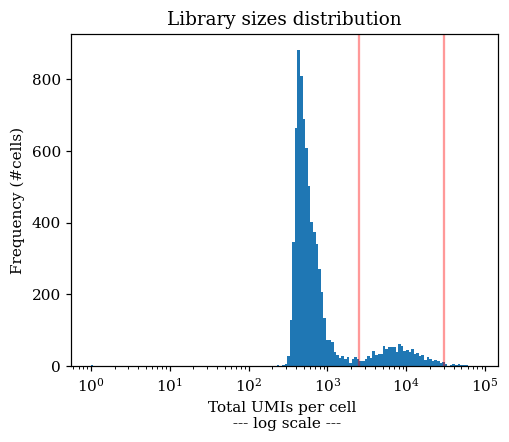

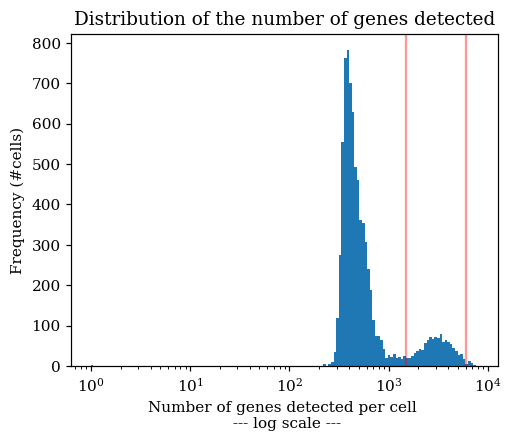

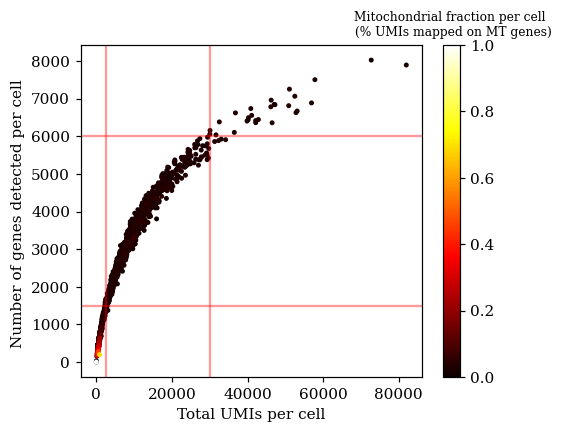

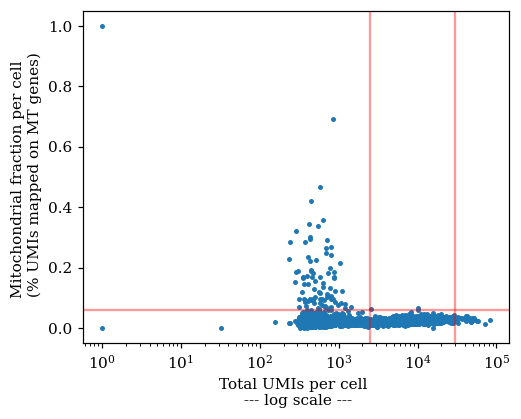

In [105]:
sc.plot_qc(n_counts_max=30000, n_counts_min = 2500, n_genes_max=6000, n_genes_min = 1500, mt_max = 0.06, n_bins=150)

__Filtering cells__

In [106]:
sc.filter_cells(n_counts_max=30000, n_counts_min = 2500, n_genes_max=6000, n_genes_min = 1500, mt_max = 0.06);

In [107]:
sc.mtx.shape

(1085, 20305)

__QC after filtering__

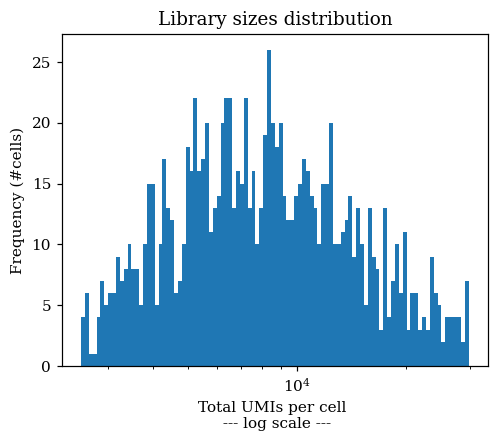

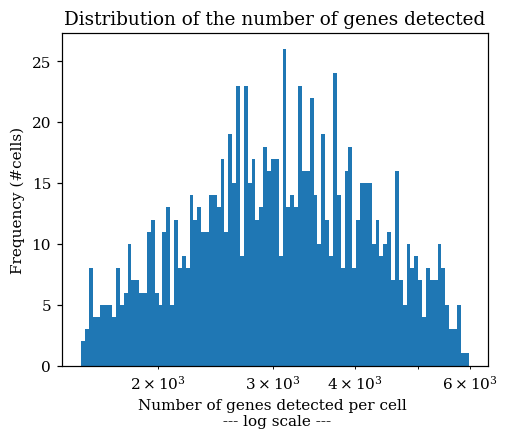

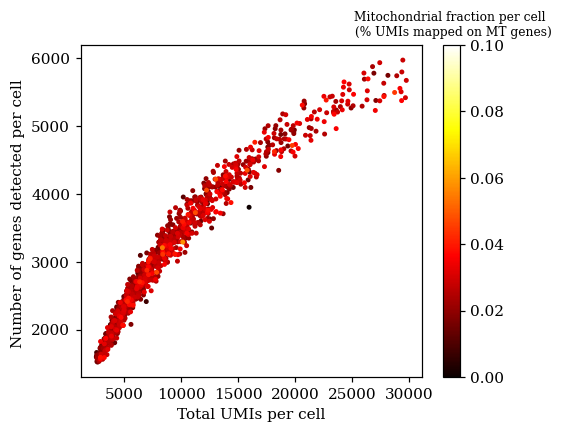

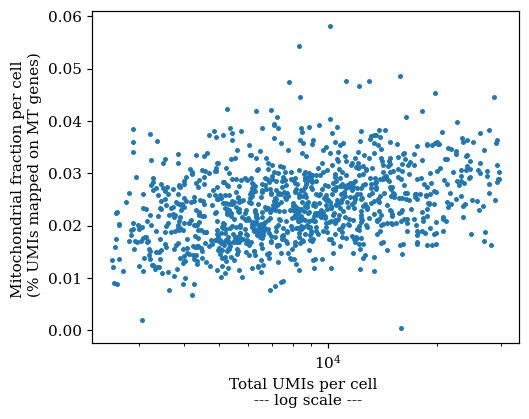

In [108]:
sc.plot_qc(show_cutoffs=False)

__Saving filtered count matrix__

In [109]:
sc.save_files(pp="filtered/stringent")